In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
df = pd.read_csv("anscombes.csv")

In [3]:
df1 = df[df['dataset'] == 'I']
x1, y1 = df1['x'].to_numpy(), df1['y'].to_numpy()
df2 = df[df['dataset'] == 'II']
x2, y2 = df2['x'].to_numpy(), df2['y'].to_numpy()
df3 = df[df['dataset'] == 'III']
x3, y3 = df3['x'].to_numpy(), df3['y'].to_numpy()
df4 = df[df['dataset'] == 'IV']
x4, y4 = df4['x'].to_numpy(), df4['y'].to_numpy()

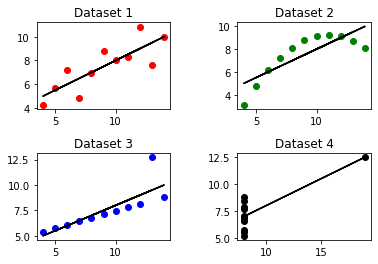

In [4]:
#print(df1, df2, df3, df4)
fig, axis = plt.subplots(2,2)
#dataset 1
axis[0, 0].scatter(x1, y1, color='red')
coef1 = np.polyfit(x1,y1,1)
poly1d_fn = np.poly1d(coef1) 
axis[0, 0].plot(x1, poly1d_fn(x1), color='black')
axis[0, 0].set_title('Dataset 1')

#dataset 1
axis[0, 1].scatter(x2, y2, color='green')
coef2 = np.polyfit(x2,y2,1)
poly1d_fn = np.poly1d(coef2) 
axis[0, 1].plot(x2, poly1d_fn(x2), color='black')
axis[0, 1].set_title('Dataset 2')

#dataset 1
axis[1, 0].scatter(x3, y3, color='blue')
coef3 = np.polyfit(x3,y3,1)
poly1d_fn = np.poly1d(coef3) 
axis[1, 0].plot(x3, poly1d_fn(x3), color='black')
axis[1, 0].set_title('Dataset 3')

#dataset 1
axis[1, 1].scatter(x4, y4, color='black')
coef4 = np.polyfit(x4,y4,1)
poly1d_fn = np.poly1d(coef4) 
axis[1, 1].plot(x4, poly1d_fn(x4), color='black')
axis[1, 1].set_title('Dataset 4')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [5]:
print(coef1, coef2, coef3, coef4)

x1m = df1.x.mean()
y1m = df1.y.mean()
print(x1m, y1m)

[0.50009091 3.00009091] [0.5        3.00090909] [0.49972727 3.00245455] [0.49990909 3.00172727]
9.0 7.500909090909093


In [6]:
#Implementing turing learning algorithm to generat unique datasets

def get_values(df):
    """
    Calculates the summary statistics for the given dataset
    Args: df (pd.DataFrame): A DataFrame with x and y columns
    Returns: list: [x-mean, y-mean, x-stdev, y-stdev, correlation]
    """
    xm = df.x.mean()
    ym = df.y.mean()
    xsd = df.x.std()
    ysd = df.y.std()
    pc = df.corr().x.y

    return [xm, ym, xsd, ysd, pc]


In [7]:
def is_error_still_ok(df1, df2, decimals=2):
    """Checks to see if the statistics are still within the acceptable bounds
    Args:
        df1 (pd.DataFrame): The original data set
        df2 (pd.DataFrame): The test data set
        decimals (int):     The number of decimals of precision to check
    Returns: bool: ``True`` if the maximum error is acceptable, ``False`` otherwise
    """
    r1 = get_values(df1)
    r2 = get_values(df2)

    # check each of the error values to check if they are the same to the
    # correct number of decimals
    r1 = [math.floor(r * 10**decimals) for r in r1]
    r2 = [math.floor(r * 10**decimals) for r in r2]

    # we are good if r1 and r2 have the same numbers
    er = np.subtract(r1, r2)
    er = [abs(n) for n in er]

    return np.max(er) == 0

In [8]:
def save_scatter(df, iteration, dp=72):
    """Save the plot to an image file
    Args:
        df (pd.DataFrame):  The data set to plot
        iteration (int):    The iteration count
        dp (int):           The DPI of the plot
    """
    show_scatter(df)
    plt.savefig('{}.png'.format(iteration), dpi=dp)
    plt.clf()
    plt.cla()
    plt.close()

In [9]:
def save_scatter_and_results(df, iteration, dp=72):
    """Save the plot with statistical summary embedded to an image file
    Args:
        df (pd.DataFrame):  The data set to plot
        iteration (int):    The iteration count
        dp (int):           The DPI of the plot
    """
    show_scatter_and_results(df)
    plt.savefig(str(iteration) + ".png", dpi=dp)
    plt.clf()
    plt.cla()
    plt.close()

In [10]:
def print_stats(df_list):
    for i in range(0,len(df_list)):
        print('------DATASET {}-------'.format(i))
        print("N: ", len(df))
        print("X mean: ", df.x.mean())
        print("X SD: ", df.x.std())
        print("Y mean: ", df.y.mean())
        print("Y SD: ", df.y.std())
        print("Pearson correlation: ", df.corr().x.y)


In [11]:
#df_list = [df1, df2, df3, df4]
#print_stats(df_list)
#print(np.ones((11,1)))

In [12]:
population_size = (10,11,2)
new_population = np.random.uniform(low=1, high=12, size=population_size)
#print(new_population[0])
#ones = np.ones((11,1))*new_population[0].mean()
print(new_population[0])


[[ 5.89305552  8.30330349]
 [ 6.11156407  9.18244243]
 [ 4.19553644  6.42981023]
 [ 6.79253809 10.62266977]
 [ 2.3426459   8.61866183]
 [10.2448742   7.28938298]
 [ 1.69134008  1.99180777]
 [ 2.91360522  9.52305121]
 [ 7.41663605  3.34727393]
 [ 2.88848456  6.28446118]
 [ 5.10944915  6.22339279]]


In [13]:
#print_stats(new_population)
def set_mean_to_zero(old_pop):
    for i in range(0, len(old_pop)):
        ones = np.ones((11,1))*new_population[i].mean()
        old_pop[i] = old_pop[i] - ones
    return old_pop

def orthnormalise_population(old_pop):
    for z in range(0, len(old_pop[1])):
        X = np.zeros(old_pop[z].shape)
        for i in range(X.shape[1]):
            # orthogonalization
            vector = old_pop[z][:, i]
            space = X[:, :i]
            projection = vector @ space
            vector = vector - np.sum(projection * space, axis=1)
            # normalization
            norm = np.sqrt(vector @ vector)
            vector /= abs(norm) < 1e-8 and 1 or norm

            X[:, i] = vector
        return X
    

def preprocess_new_population(new_pop):
    pop = new_pop.copy()
    pop = set_mean_to_zero(pop)
    
    pop = orthnormalise_population(pop)
    return pop

ortho_pop = preprocess_new_population(new_population)
print(ortho_pop[0])

[-0.01948949  0.25093162]


In [32]:
X = new_population[0]
z = np.array(df1[['x', 'y']])
print(np.cov(z))
print(math.sqrt(10)*ortho_pop[0]*z + np.ones((11,1))*z.mean())
def transform(pop,X_org):
    for x in range(0, len(pop[1])):
        pop[x] = math.sqrt(10)*ortho_pop[0]*z + np.ones((11,1))*z.mean()
    return pop

#print(new_population[0])

[[ 1.9208   1.029    5.3116   0.1862   2.6166   3.9592  -1.2152  -0.2548
   1.1368   2.1364  -0.6664 ]
 [ 1.029    0.55125  2.8455   0.09975  1.40175  2.121   -0.651   -0.1365
   0.609    1.1445  -0.357  ]
 [ 5.3116   2.8455  14.6882   0.5149   7.2357  10.9484  -3.3604  -0.7046
   3.1436   5.9078  -1.8428 ]
 [ 0.1862   0.09975  0.5149   0.01805  0.25365  0.3838  -0.1178  -0.0247
   0.1102   0.2071  -0.0646 ]
 [ 2.6166   1.40175  7.2357   0.25365  3.56445  5.3934  -1.6554  -0.3471
   1.5486   2.9103  -0.9078 ]
 [ 3.9592   2.121   10.9484   0.3838   5.3934   8.1608  -2.5048  -0.5252
   2.3432   4.4036  -1.3736 ]
 [-1.2152  -0.651   -3.3604  -0.1178  -1.6554  -2.5048   0.7688   0.1612
  -0.7192  -1.3516   0.4216 ]
 [-0.2548  -0.1365  -0.7046  -0.0247  -0.3471  -0.5252   0.1612   0.0338
  -0.1508  -0.2834   0.0884 ]
 [ 1.1368   0.609    3.1436   0.1102   1.5486   2.3432  -0.7192  -0.1508
   0.6728   1.2644  -0.3944 ]
 [ 2.1364   1.1445   5.9078   0.2071   2.9103   4.4036  -1.3516  -0.2834
